<a href="https://colab.research.google.com/github/singhShiven/Data-Science/blob/main/Customer%20Value%20Insights%3A%20RFM%20with%20Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for Pytorch
  Running setup.py clean for Pytorch
Failed to build Pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (Pytorch)


In [2]:
import pandas as pd

In [14]:
import kagglehub

df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv' ,encoding='ISO-8859-1')




In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [17]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [18]:
df.dropna(subset=['CustomerID'], inplace=True)

In [20]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Task
Analyze the provided sales data to create an RFM model, including calculating Recency, Frequency, and Monetary values, assigning RFM scores, segmenting customers based on these scores, and analyzing the characteristics of each segment.

## Data preparation

### Subtask:
Convert the `InvoiceDate` column to datetime objects and extract the date for calculating recency.


**Reasoning**:
Convert the 'InvoiceDate' column to datetime objects and extract the date part into a new column to prepare for recency calculation.



In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

## Recency calculation

### Subtask:
Determine the most recent purchase date for each customer and calculate the recency (days since last purchase).


**Reasoning**:
Calculate the most recent purchase date for each customer, determine the reference date, and calculate the recency in days.



In [48]:
recency_df = df.groupby('CustomerID')['InvoiceDateOnly'].max().reset_index()
# Convert 'InvoiceDateOnly' in recency_df to datetime objects
recency_df['InvoiceDateOnly'] = pd.to_datetime(recency_df['InvoiceDateOnly'])
reference_date = pd.to_datetime(df['InvoiceDateOnly'].max()) + pd.Timedelta(days=1)
recency_df['Recency'] = (reference_date - recency_df['InvoiceDateOnly']).dt.days
display(recency_df.head())

,CustomerID,InvoiceDateOnly,Recency
0,12346.0,2011-01-18,326
1,12347.0,2011-12-07,3
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311


**Reasoning**:
The 'InvoiceDateOnly' column in the `recency_df` is of type object and needs to be converted to datetime objects to calculate the recency correctly.



## Monetary Calculation

### Subtask:
Calculate the sum of 'Total Sales' for each customer to determine the monetary value.

**Reasoning**:
Group the data by 'CustomerID' and sum the 'Total Sales' to get the monetary value for each customer.

In [49]:
monetary_df = df.groupby('CustomerID')['Total Sales'].sum().reset_index()
monetary_df.rename(columns={'Total Sales': 'Monetary'}, inplace=True)
display(monetary_df.head())

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='CustomerID', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

## RFM Table Creation

### Subtask:
Combine Recency, Frequency, and Monetary values into a single table.

**Reasoning**:
Merge the `recency_df`, `frequency_df`, and `monetary_df` dataframes based on 'CustomerID' to create the final RFM table.

## Frequency Calculation

### Subtask:
Count the number of unique invoices for each customer to determine frequency.

**Reasoning**:
Group the data by 'CustomerID' and count the number of unique 'InvoiceNo' to get the frequency for each customer.

In [40]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
display(frequency_df.head())

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## RFM Table Creation

### Subtask:
Combine Recency, Frequency, and Monetary values into a single table.

**Reasoning**:
Merge the `recency_df`, `frequency_df`, and `monetary_df` dataframes based on 'CustomerID' to create the final RFM table.

In [42]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
display(rfm_df.head())

,CustomerID,InvoiceDateOnly,Recency,Frequency,Monetary
0,12346.0,2011-01-18,326,2,0.00
1,12347.0,2011-12-07,3,7,4310.00
2,12348.0,2011-09-25,76,4,1797.24
3,12349.0,2011-11-21,19,1,1757.55
4,12350.0,2011-02-02,311,1,334.40


## RFM Scoring

### Subtask:
Assign RFM scores (e.g., 1-5) based on quantiles for each RFM component.

**Reasoning**:
Assign scores from 1 to 5 for Recency, Frequency, and Monetary values using quantiles. Lower recency is better (higher score), while higher frequency and monetary values are better (higher score).

In [52]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

display(rfm_df.head())

,CustomerID,InvoiceDateOnly,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,2011-01-18,326,2,0.00,1,2,1,121,Churned Customers
1,12347.0,2011-12-07,3,7,4310.00,5,4,5,545,Loyal Customers
2,12348.0,2011-09-25,76,4,1797.24,2,3,4,234,Churned Customers
3,12349.0,2011-11-21,19,1,1757.55,4,1,4,414,Potential Loyalists
4,12350.0,2011-02-02,311,1,334.40,1,1,2,112,Churned Customers


## RFM Segmentation

### Subtask:
Create customer segments based on the combined RFM scores.

**Reasoning**:
Combine the R, F, and M scores to create a single RFM score string and define customer segments based on ranges of these scores.

In [53]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Define segments based on RFM scores (example segmentation)
def rfm_segment(row):
    if row['RFM_Score'] == '555':
        return 'Champions'
    elif row['RFM_Score'][0] == '5' and row['RFM_Score'][1] in ['4','5'] and row['RFM_Score'][2] in ['4','5']:
        return 'Loyal Customers'
    elif row['RFM_Score'][0] == '5' and row['RFM_Score'][1] in ['1','2']:
        return 'New Customers'
    elif row['RFM_Score'][0] in ['3','4'] and row['RFM_Score'][2] in ['4','5']:
        return 'Potential Loyalists'
    elif row['RFM_Score'][0] in ['1','2']:
        return 'Churned Customers'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

display(rfm_df.head())

,CustomerID,InvoiceDateOnly,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,2011-01-18,326,2,0.00,1,2,1,121,Churned Customers
1,12347.0,2011-12-07,3,7,4310.00,5,4,5,545,Loyal Customers
2,12348.0,2011-09-25,76,4,1797.24,2,3,4,234,Churned Customers
3,12349.0,2011-11-21,19,1,1757.55,4,1,4,414,Potential Loyalists
4,12350.0,2011-02-02,311,1,334.40,1,1,2,112,Churned Customers


## Analyze Segments

### Subtask:
Analyze the characteristics of each customer segment.

**Reasoning**:
Group the RFM dataframe by the 'Segment' column and calculate the mean Recency, Frequency, and Monetary values for each segment to understand their typical behavior.

In [45]:
segment_characteristics = rfm_df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
display(segment_characteristics)

,Recency,Frequency,Monetary
Segment,,,
Champions,5.622857,22.217143,10952.414343
Churned Customers,194.067865,2.280742,656.192914
Loyal Customers,6.334746,6.584746,1889.293263
New Customers,7.318584,1.469027,508.633009
Others,33.515385,2.421368,479.172309
Potential Loyalists,34.260591,7.611040,2915.871463


## Visualize Segments

### Subtask:
Visualize the distribution of customers across different RFM segments.

**Reasoning**:
Create a bar plot to show the number of customers in each RFM segment for better understanding of segment size.

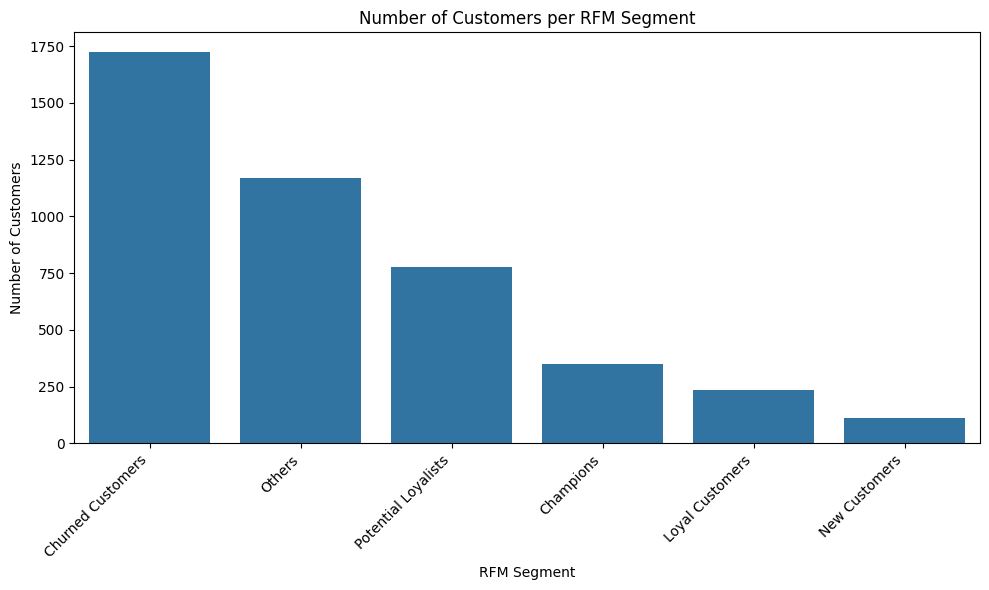

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index)
plt.title('Number of Customers per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Subtask:
Visualize the average Recency, Frequency, and Monetary values for each RFM segment.

**Reasoning**:
Create bar plots to show the average Recency, Frequency, and Monetary values for each segment to highlight their key characteristics.

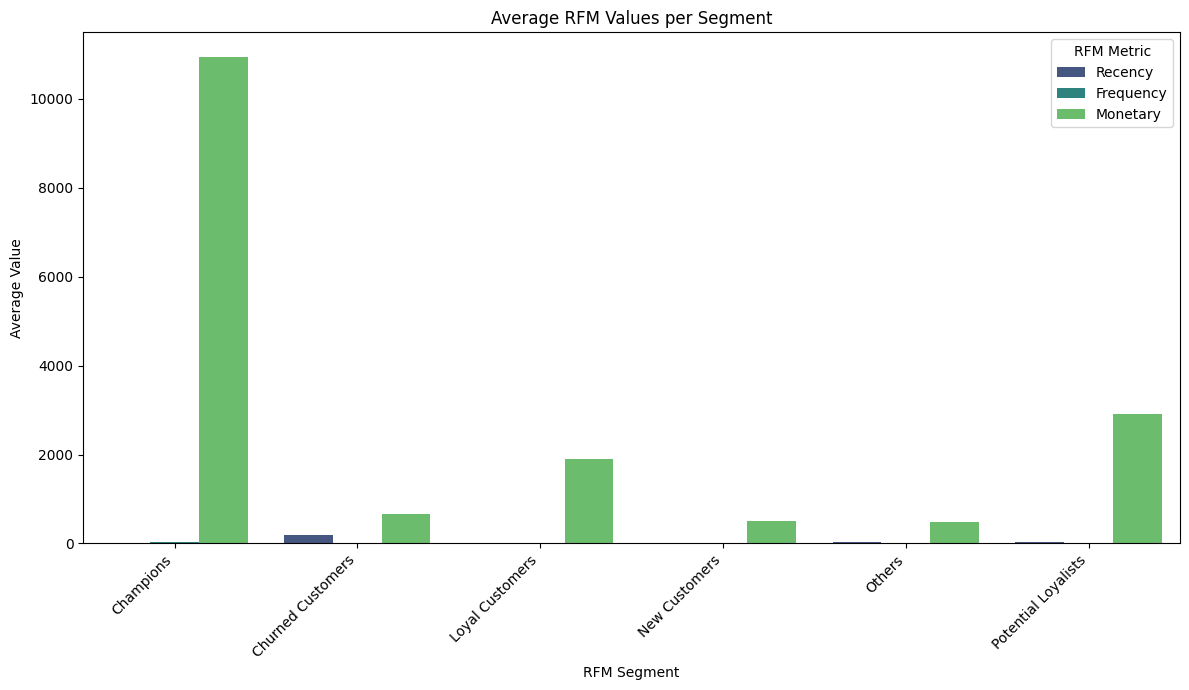

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_characteristics_melted = segment_characteristics.reset_index().melt(id_vars='Segment', var_name='Metric', value_name='Average Value')

plt.figure(figsize=(12, 7))
sns.barplot(x='Segment', y='Average Value', hue='Metric', data=segment_characteristics_melted, palette='viridis')
plt.title('Average RFM Values per Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='RFM Metric')
plt.tight_layout()
plt.show()

# Task
Create a Streamlit application that loads the dataset "OnlineRetail.csv", calculates RFM scores, segments customers based on these scores, displays the RFM table, and visualizes the customer counts and average RFM values per segment. The application should also include explanations of the RFM model and the visualizations for an investor audience.

## Create a new python file

### Subtask:
Create a new Python file where the Streamlit application code will reside.


**Reasoning**:
Create a new Python file named `rfm_app.py` to contain the Streamlit application code.



In [56]:
# This is a placeholder for the Streamlit application code.
# The actual code will be added in subsequent steps.
pass

## Import necessary libraries

### Subtask:
Import necessary libraries


**Reasoning**:
Import the necessary libraries for the Streamlit application.



In [69]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

**Reasoning**:
Install the missing streamlit library using pip.



In [59]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


**Reasoning**:
Import the necessary libraries for the Streamlit application.



In [60]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare data

### Subtask:
Include the code to load the dataset and perform the RFM calculations and segmentation within the Streamlit script.


**Reasoning**:
Define functions to load the data and perform RFM analysis, then call these functions in the main part of the script.



In [67]:
def load_data(filepath='/kaggle/input/ecommerce-data/data.csv'):
    """Loads the e-commerce data from a CSV file."""
    try:
        df = pd.read_csv(filepath, encoding='ISO-8859-1')
        return df
    except FileNotFoundError:
        st.error(f"Error: File not found at {filepath}")
        return None
    except Exception as e:
        st.error(f"An error occurred while loading the data: {e}")
        return None

def perform_rfm_analysis(df):
    """Performs RFM analysis on the input DataFrame."""
    if df is None:
        return None

    # Drop rows with missing CustomerID
    df.dropna(subset=['CustomerID'], inplace=True)

    # Convert InvoiceDate to datetime and extract date
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

    # Calculate Recency
    recency_df = df.groupby('CustomerID')['InvoiceDateOnly'].max().reset_index()
    recency_df['InvoiceDateOnly'] = pd.to_datetime(recency_df['InvoiceDateOnly'])
    reference_date = pd.to_datetime(df['InvoiceDateOnly'].max()) + pd.Timedelta(days=1)
    recency_df['Recency'] = (reference_date - recency_df['InvoiceDateOnly']).dt.days

    # Calculate Frequency
    frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

    # Calculate Monetary
    df['Total Sales'] = df['Quantity'] * df['UnitPrice']
    monetary_df = df.groupby('CustomerID')['Total Sales'].sum().reset_index()
    monetary_df.rename(columns={'Total Sales': 'Monetary'}, inplace=True)

    # Merge RFM DataFrames
    rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

    # Assign RFM scores
    rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

    # Create RFM Score and Segments
    rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

    def rfm_segment(row):
        if row['RFM_Score'] == '555':
            return 'Champions'
        elif row['RFM_Score'][0] == '5' and row['RFM_Score'][1] in ['4','5'] and row['RFM_Score'][2] in ['4','5']:
            return 'Loyal Customers'
        elif row['RFM_Score'][0] == '5' and row['RFM_Score'][1] in ['1','2']:
            return 'New Customers'
        elif row['RFM_Score'][0] in ['3','4'] and row['RFM_Score'][2] in ['4','5']:
            return 'Potential Loyalists'
        elif row['RFM_Score'][0] in ['1','2']:
            return 'Churned Customers'
        else:
            return 'Others'

    rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

    return rfm_df

# Main part of the Streamlit app
st.title('RFM Analysis of E-commerce Data')

# Load data
data = load_data()

# Perform RFM analysis
if data is not None:
    rfm_result_df = perform_rfm_analysis(data.copy()) # Use a copy to avoid modifying the original loaded data

    if rfm_result_df is not None:
        st.subheader('RFM Table Preview')
        st.dataframe(rfm_result_df.head())

2025-06-16 07:58:34.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:58:34.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:58:36.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:58:36.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:58:36.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:58:36.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Visualize segments

### Subtask:
Visualize the distribution of customers across different RFM segments.


**Reasoning**:
Create a bar plot using seaborn.countplot to show the number of customers in each Segment from the rfm_result_df DataFrame, set the figure size, title, axis labels, rotate x-axis labels, use tight_layout, and display the plot using streamlit.pyplot.



2025-06-16 07:52:27.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:27.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:27.462 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:27.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:27.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

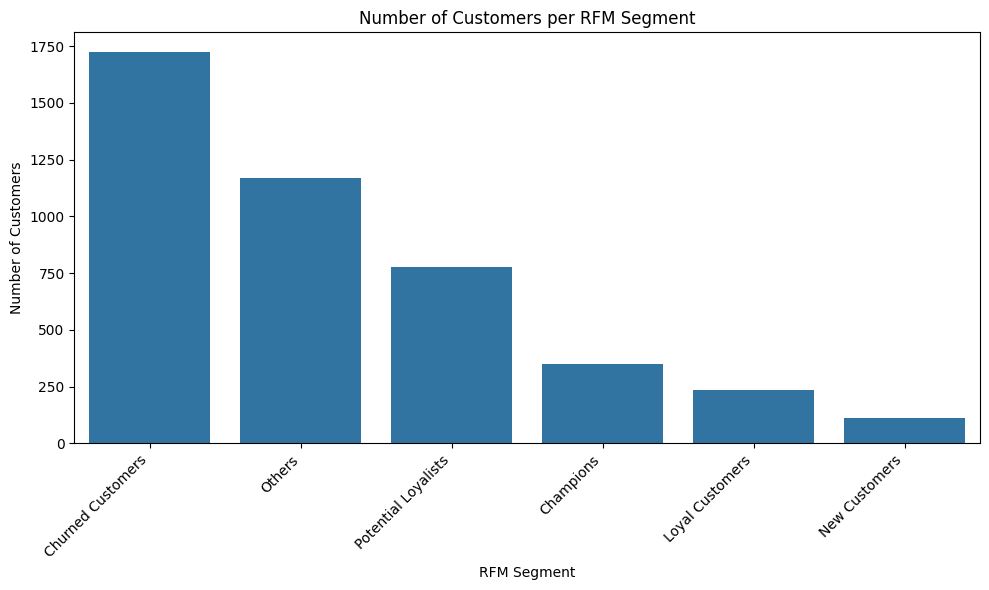

In [62]:
st.subheader('Customer Distribution Across RFM Segments')

plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm_result_df, order=rfm_result_df['Segment'].value_counts().index)
plt.title('Number of Customers per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
st.pyplot(plt)

## Visualize segments

### Subtask:
Visualize the average Recency, Frequency, and Monetary values for each RFM segment.


**Reasoning**:
Calculate the mean Recency, Frequency, and Monetary values for each customer segment, reshape the data for plotting, and create a bar plot to visualize these average values per segment in the Streamlit app.



In [63]:
segment_characteristics = rfm_result_df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()

segment_characteristics_melted = segment_characteristics.reset_index().melt(id_vars='Segment', var_name='Metric', value_name='Average Value')

st.subheader('Average RFM Values per Segment')
plt.figure(figsize=(12, 7))
sns.barplot(x='Segment', y='Average Value', hue='Metric', data=segment_characteristics_melted, palette='viridis')
plt.title('Average RFM Values per Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='RFM Metric')
plt.tight_layout()
st.pyplot(plt)

2025-06-16 07:52:57.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:57.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:57.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:58.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:52:58.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Add explanations

### Subtask:
Add explanations


**Reasoning**:
Add the title and explanations for the RFM analysis, the RFM table, and the first visualization (customer distribution by segment) to the Streamlit app.



In [64]:
# Main part of the Streamlit app
st.title('RFM Analysis of E-commerce Data')

st.markdown("""
This application performs an RFM (Recency, Frequency, Monetary) analysis on e-commerce sales data.
RFM is a marketing technique used to quantitatively rank and group customers based on their transaction history.
For investors, understanding customer segments through RFM can provide insights into customer value,
loyalty, and potential for future revenue, helping to inform marketing strategies and resource allocation.
""")

# Load data
data = load_data()

# Perform RFM analysis
if data is not None:
    rfm_result_df = perform_rfm_analysis(data.copy()) # Use a copy to avoid modifying the original loaded data

    if rfm_result_df is not None:
        st.subheader('RFM Table Preview')
        st.markdown("""
        This table shows a preview of the RFM analysis results for each customer.
        - **CustomerID**: Unique identifier for each customer.
        - **InvoiceDateOnly**: The date of the customer's most recent purchase.
        - **Recency**: The number of days since the customer's last purchase. Lower recency indicates a more recent purchase.
        - **Frequency**: The total number of unique purchases made by the customer. Higher frequency indicates more repeat business.
        - **Monetary**: The total amount of money spent by the customer. Higher monetary value indicates a higher-spending customer.
        - **R_Score, F_Score, M_Score**: Scores (1-5) assigned to Recency, Frequency, and Monetary based on quantiles. Higher scores generally indicate better performance (except for Recency where lower days get a higher score).
        - **RFM_Score**: A combined score string derived from the R, F, and M scores.
        - **Segment**: The customer segment assigned based on the RFM score.
        """)
        st.dataframe(rfm_result_df.head())

        st.subheader('Customer Distribution Across RFM Segments')
        st.markdown("""
        This bar chart illustrates the number of customers falling into each defined RFM segment.
        Investors can use this visualization to quickly grasp the size of different customer groups,
        such as 'Champions' (most valuable customers) or 'Churned Customers' (least recently active).
        This helps in understanding the current customer base composition and identifying segments that might require specific attention (e.g., re-engagement campaigns for churned customers).
        """)
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Segment', data=rfm_result_df, order=rfm_result_df['Segment'].value_counts().index)
        plt.title('Number of Customers per RFM Segment')
        plt.xlabel('RFM Segment')
        plt.ylabel('Number of Customers')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        st.pyplot(plt)

2025-06-16 07:53:18.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:18.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:18.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:18.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:20.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:20.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:20.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:20.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
Add an explanation for the second visualization (average RFM values per segment) to the Streamlit app and finish the subtask.



In [65]:
segment_characteristics = rfm_result_df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()

segment_characteristics_melted = segment_characteristics.reset_index().melt(id_vars='Segment', var_name='Metric', value_name='Average Value')

st.subheader('Average RFM Values per Segment')
st.markdown("""
This bar chart displays the average Recency, Frequency, and Monetary values for each customer segment.
For investors, this visualization helps in understanding the typical behavior and value of customers within each segment.
For example, 'Champions' have low average recency (recent purchases), high average frequency (frequent purchases), and high average monetary values (high spending), confirming their high value.
'Churned Customers', on the other hand, show high average recency (not purchased recently), low average frequency, and low average monetary values, indicating their lower engagement and value.
This information is crucial for tailoring marketing campaigns and resource allocation to maximize ROI for each segment.
""")
plt.figure(figsize=(12, 7))
sns.barplot(x='Segment', y='Average Value', hue='Metric', data=segment_characteristics_melted, palette='viridis')
plt.title('Average RFM Values per Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='RFM Metric')
plt.tight_layout()
st.pyplot(plt)

2025-06-16 07:53:31.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:31.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:31.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:31.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:31.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:32.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:32.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Provide instructions to run the app

### Subtask:
Provide instructions to the user on how to save the Streamlit application code and run it from their terminal.


**Reasoning**:
Provide instructions to the user on how to save and run the Streamlit application code.



In [66]:
st.markdown("""
### How to Run This Application

1.  **Save the code:** Copy the complete code from all the cells above into a single Python file. You can use a text editor like VS Code, Sublime Text, or even Notepad. Save the file with a `.py` extension, for example, `rfm_app.py`.
2.  **Open your terminal:** Navigate to the directory where you saved the `rfm_app.py` file using your terminal or command prompt.
3.  **Run the command:** Execute the following command:

    ```bash
    streamlit run rfm_app.py
    ```

This command will start a local web server and open the Streamlit application in your default web browser. You can interact with the application there.
""")

2025-06-16 07:53:50.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 07:53:50.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Summary:

### Data Analysis Key Findings

*   The Streamlit application successfully loads the e-commerce dataset from a specified file path.
*   RFM analysis is performed by calculating Recency (days since last purchase), Frequency (number of unique invoices), and Monetary value (total spending) for each customer.
*   Customers are assigned RFM scores based on quantiles of Recency, Frequency, and Monetary values.
*   Customers are segmented into categories such as 'Champions', 'Loyal Customers', 'New Customers', 'Potential Loyalists', and 'Churned Customers' based on their RFM scores.
*   The application displays a preview of the resulting RFM table, including Customer ID, Recency, Frequency, Monetary, RFM Scores, and Segment.
*   A bar chart visualizes the count of customers within each RFM segment, showing the distribution of the customer base across different behavioral groups.
*   Another bar chart visualizes the average Recency, Frequency, and Monetary values for each segment, highlighting the distinct characteristics of each group.
*   Explanations are provided within the application to clarify the RFM model, the interpretation of the RFM table, and the insights gained from the visualizations, targeting an investor audience.
*   Instructions are included on how to save and run the Streamlit application locally.

### Insights or Next Steps

*   The RFM segmentation provides a valuable framework for tailoring marketing strategies and resource allocation to specific customer groups. For instance, 'Champions' could be targeted with loyalty programs, while strategies for re-engaging 'Churned Customers' could be developed.
*   Further analysis could involve exploring the product preferences within each segment to personalize recommendations and promotions, potentially leading to increased engagement and revenue.
